# Transforming Bimodally Distributed Data to a Normal Distribution Using a Quantile Transformer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

from sklearn.preprocessing import QuantileTransformer

In [2]:
store_visits = pd.read_csv('datasets/store_visits.csv')

store_visits.sample(10)

,Visits,Revenue,StoreID
372,437.292405,691.922232,0
313,515.721055,704.241237,0
99,1123.869206,5719.346029,1
79,983.610239,4949.051195,1
17,1025.716755,5134.583775,1
374,558.793306,765.869790,0
74,732.031968,3668.159839,1
131,1034.158712,5215.793559,1
328,405.474515,721.581403,0
323,447.200785,758.166689,0


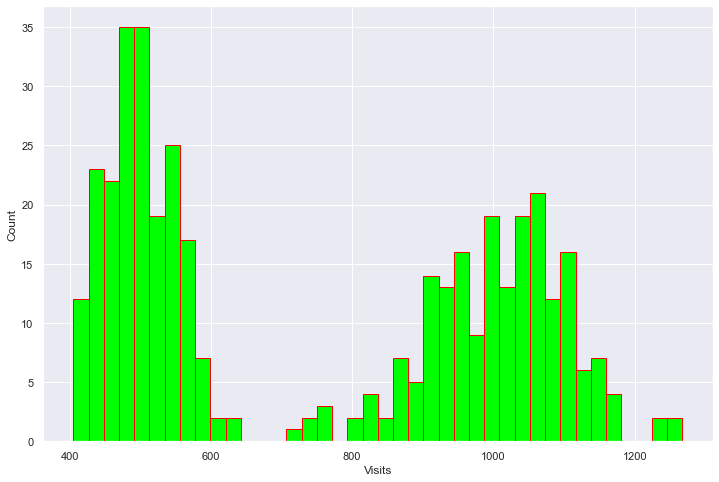

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Visits'],
        facecolor='lime',
        edgecolor='red',
        bins=40)

plt.xlabel('Visits')
plt.ylabel('Count')

plt.show()

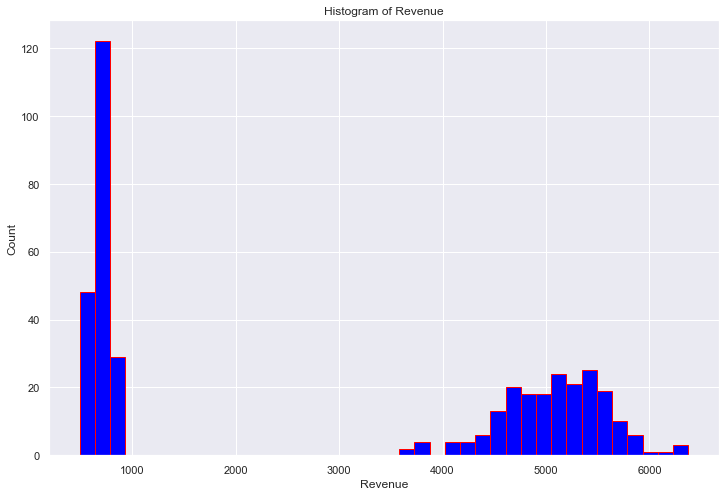

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Revenue'],
        facecolor='blue',
        edgecolor='red',
        bins=40)

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

In [6]:
transformer = QuantileTransformer(output_distribution='normal', n_quantiles=200)

store_transform = transformer.fit_transform(store_visits[['Visits', 'Revenue']])

In [7]:
store_transform_df = pd.DataFrame(data = store_transform,
                                 columns=['Visits_transform', 'Revenue_transform'])

store_transform_df.head()

,Visits_transform,Revenue_transform
0,0.689662,0.733025
1,0.990498,0.989974
2,0.315277,0.334061
3,0.370619,0.426712
4,1.221233,1.245011


In [8]:
final_df = pd.concat([store_visits, store_transform_df], axis=1)

final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.689662,0.733025
1,1058.607260,5349.036298,1,0.990498,0.989974
2,935.069491,4756.347453,1,0.315277,0.334061
3,952.360965,4849.804826,1,0.370619,0.426712
4,1078.384010,5467.920052,1,1.221233,1.245011


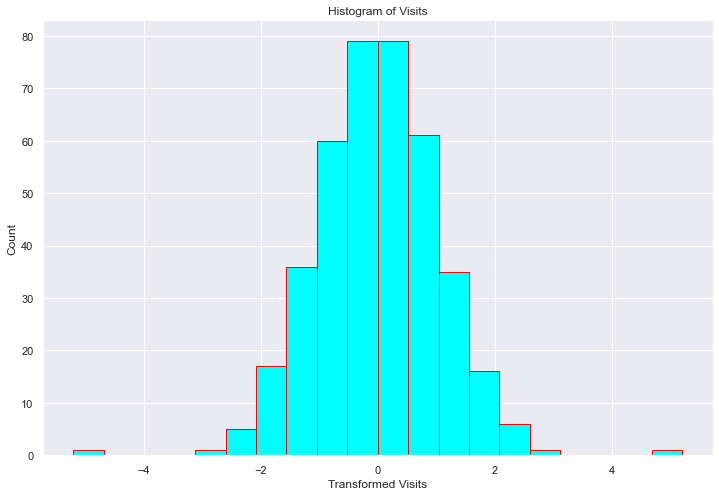

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Visits_transform'],
        facecolor='cyan',
        edgecolor='red',
        bins=20)

plt.xlabel('Transformed Visits')
plt.ylabel('Count')
plt.title('Histogram of Visits')

plt.show()

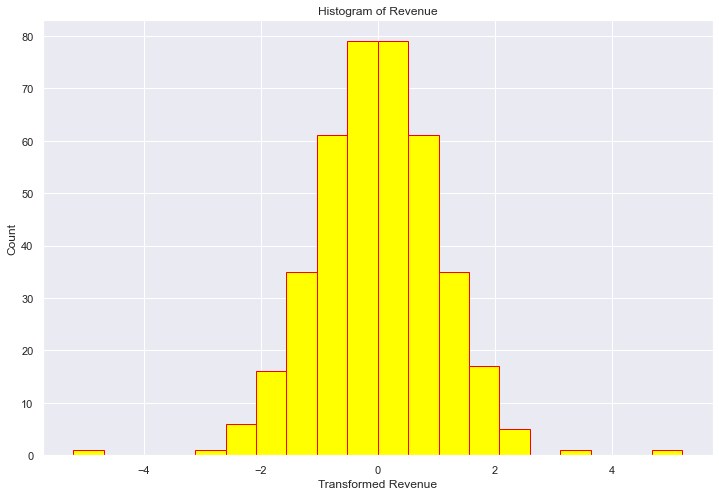

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Revenue_transform'],
        facecolor='yellow',
        edgecolor='red',
        bins=20)

plt.xlabel('Transformed Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

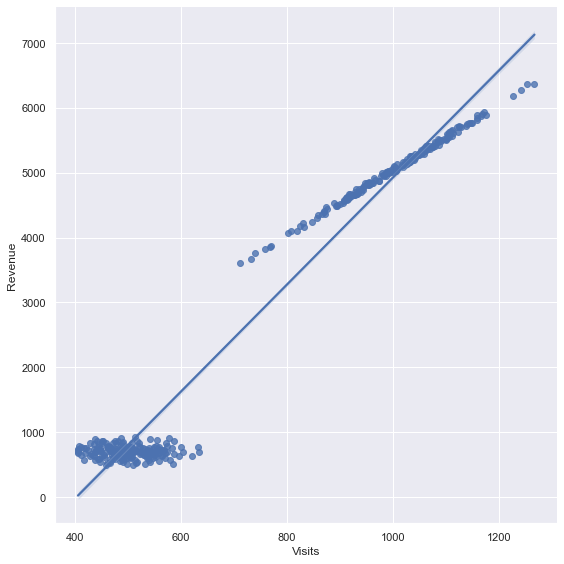

In [11]:
sns.lmplot(x='Visits',
          y='Revenue',
          data=final_df,
          height=8)

plt.show()

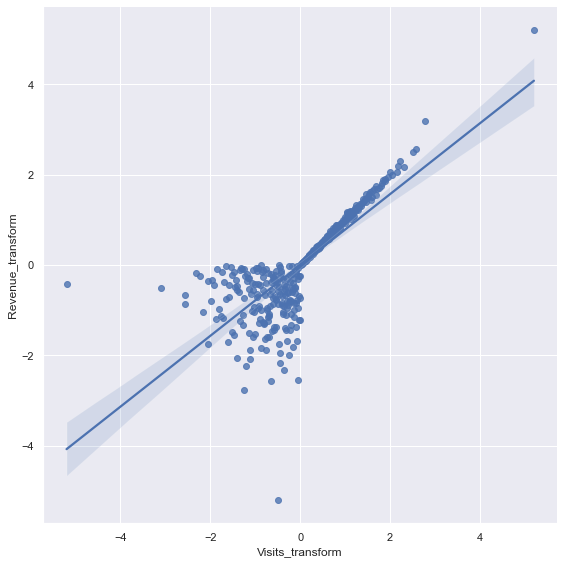

In [14]:
g = sns.lmplot(x='Visits_transform',
              y='Revenue_transform',
              data=final_df,
              height=8)

plt.show()